In [76]:
import matplotlib.pyplot as plt
import re

def plot_one_file(log_file,ax1,ax2):
    with open(log_file, "r") as f:
        lines = f.readlines()
    epochs, losses, accuracies = [], [], []

    for line in lines:
        match = re.search(r"Epoch\s*:\s*(\d+).*?Loss\s*:\s*([\d.]+).*?F1-score eval\s*:\s*([\d.]+)", line)
        if match:
            epoch = int(match.group(1))
            loss = float(match.group(2))
            accuracy = float(match.group(3))
            epochs.append(epoch)
            losses.append(loss)
            accuracies.append(accuracy)

    feature_name=re.search(r'Results/gossipcop/([^/]+)', log_file).group(1)
    ax1.plot(epochs, losses,label=feature_name)
    ax2.plot(epochs, accuracies,label=feature_name)
    ax1.set_xlabel("Epochs")
    ax2.set_xlabel("Epochs")

    ax1.set_ylabel("Loss")
    ax2.set_ylabel("F1-score")

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    


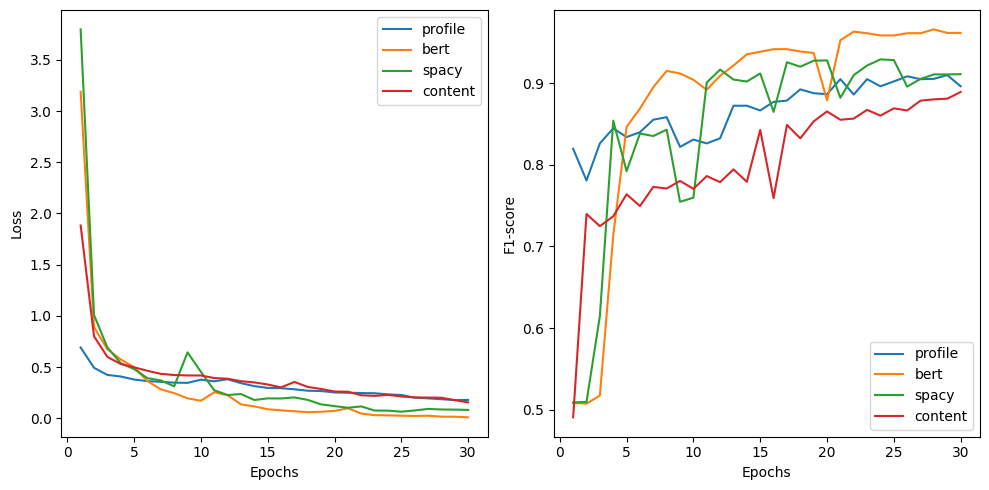

In [77]:
log_file = "Results/gossipcop/profile/custom_gat.log"  
log_file2 = "Results/gossipcop/bert/custom_gat.log"  
log_file3 = "Results/gossipcop/spacy/custom_gat.log"  
log_file4 = "Results/gossipcop/content/custom_gat.log"  

log_files=[log_file,log_file2,log_file3,log_file4]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

for file in log_files:
    plot_one_file(file,ax1,ax2)